# Fractal Dimensions

Calculate measures of fractal dimension on time series. 

Current messsy code below copies implementations:
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined

from antropy import higuchi_fd, petrosian_fd, katz_fd

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL

## Funcs

In [3]:
def convert_exp_fd(exp):
    """Convert exponent to expected Higuchi fractal dimension value.
    
    Parameters
    ----------
    exp : float
        Exponent value. 
    
    Returns
    -------
    float
        Predicted Higuchi fractal dimension value.
    
    Notes
    -----
    This works for exponents between {1, 3} (inclusive).
    Special cases:
        if exp is 0, D is 2
        if exp is 3, D is 1
        
    References
    ----------
    From F Cervantes-De la Torre et al, 2013
    """
    
    return (5 - exp) / 2

## Settings

In [4]:
# Simulation settings
n_seconds = 30
fs = 1000
default_exp = -2
default_freq = 10

# Collect together simulation parameters
sim_params_pow = {'n_seconds' : n_seconds, 'fs' : fs}

sim_params_comb = {'n_seconds' : n_seconds, 'fs' : fs,
                   'components' : {'sim_powerlaw' : {'exponent' : default_exp},
                                   'sim_oscillation' : {'freq' : default_freq}}}

In [5]:
# Set the number of instances to run
n_instances = 50

# Set the exponent range to simulate across
exps = np.arange(-3, 0.25, 0.25)
freqs = np.arange(1, 50, 2)
pows = np.arange(0, 1, 0.1)

In [6]:
# Notebooks
SAVE_FIG = False

## Calculating Fractal Dimension on Example Signals

### Powerlaw Signal

In [7]:
# Set an example exponent to simulate
exp_pl = -3

In [8]:
# Simulate a powerlaw signal
sig_pl = sim_powerlaw(n_seconds, fs, exponent=exp_pl)

In [9]:
# Calculate fractal measures on the simulated signal
h_frac = higuchi_fd(sig_pl)
k_frac = katz_fd(sig_pl)
p_frac = petrosian_fd(sig_pl)

In [10]:
# Check the calculated fractal dimension measures
print('Higuchi   FD: \t\t {:1.4f}'.format(h_frac))
print('Expected Value: \t {:1.4f}'.format(convert_exp_fd(-exp_pl)))
print('')
print('Katz      FD: \t\t {:1.4f}'.format(k_frac))
print('Petrosian FD: \t\t {:1.4f}'.format(p_frac))

Higuchi   FD: 		 1.0687
Expected Value: 	 1.0000

Katz      FD: 		 1.3043
Petrosian FD: 		 1.0067


### Combined Signal

In [11]:
# Simulate a combined signal
sig_comb = sim_powerlaw(**sim_params_comb)

In [12]:
# Calculate fractal measures on the simulated signal
h_frac = higuchi_fd(sig_comb)
k_frac = katz_fd(sig_comb)
p_frac = petrosian_fd(sig_comb)

In [13]:
# Check the calculated fractal dimension measures
print('Higuchi   FD: \t\t {:1.4f}'.format(h_frac))
print('Katz      FD: \t\t {:1.4f}'.format(k_frac))
print('Petrosian FD: \t\t {:1.4f}'.format(p_frac))

#print('Expected Value: \t\t {:1.4f}'.format(0.5))

Higuchi   FD: 		 1.4535
Katz      FD: 		 1.9111
Petrosian FD: 		 1.0161


### Knee Signal

In [14]:
# Simulate a signal with a knee
sig_kn = sim_synaptic_current(n_seconds, fs)

In [15]:
# Calculate fractal measures on the simulated signal
h_frac = higuchi_fd(sig_kn)
k_frac = katz_fd(sig_kn)
p_frac = petrosian_fd(sig_kn)

In [16]:
# Check the calculated fractal dimension measures
print('Higuchi   FD: \t\t {:1.4f}'.format(h_frac))
print('Katz      FD: \t\t {:1.4f}'.format(k_frac))
print('Petrosian FD: \t\t {:1.4f}'.format(p_frac))

#print('Expected Value: \t\t {:1.4f}'.format(0.5))

Higuchi   FD: 		 1.5936
Katz      FD: 		 3.9866
Petrosian FD: 		 1.0184


## Fracal Dimension: Aperiodic Variations

In [17]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_exp = run_sims(sim_powerlaw, sim_params_pow, higuchi_fd, {},
                        update='update_exp', values=exps, n_instances=n_instances)

kfd_sims_exp = run_sims(sim_powerlaw, sim_params_pow, katz_fd, {},
                        update='update_exp', values=exps, n_instances=n_instances)

pfd_sims_exp = run_sims(sim_powerlaw, sim_params_pow, petrosian_fd, {},
                        update='update_exp', values=exps, n_instances=n_instances)

In [18]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_comb = run_sims(sim_combined, sim_params_comb, higuchi_fd, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

kfd_sims_comb = run_sims(sim_combined, sim_params_comb, katz_fd, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

pfd_sims_comb = run_sims(sim_combined, sim_params_comb, petrosian_fd, {},
                         update='update_comb_exp', values=exps, n_instances=n_instances)

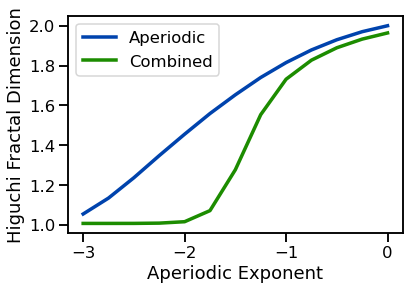

In [19]:
# Plot Higuchi fractal dimension measures
plot_lines(exps, hfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, hfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Higuchi Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='hfd_both', file_path='fractal')

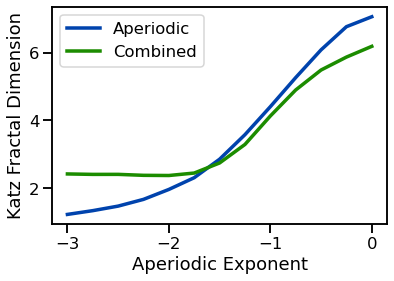

In [20]:
# Plot Katz fractal dimension measures
plot_lines(exps, kfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, kfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Katz Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='kfd_both', file_path='fractal')

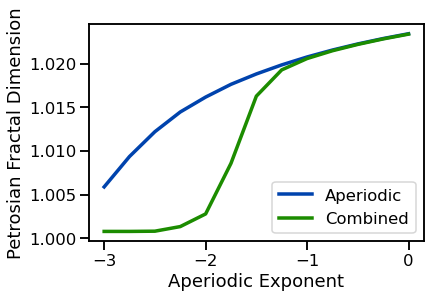

In [21]:
# Plot Petrosian fractal dimension measures
plot_lines(exps, pfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(exps, pfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Petrosian Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='pfd_both', file_path='fractal')

## Fracal Dimension: Periodic Variations

In [22]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hfd_sims_freq = run_sims(sim_combined, sim_params_comb, higuchi_fd, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

kfd_sims_freq = run_sims(sim_combined, sim_params_comb, katz_fd, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

pfd_sims_freq = run_sims(sim_combined, sim_params_comb, petrosian_fd, {},
                         update='update_freq', values=freqs, n_instances=n_instances)

In [23]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hfd_sims_pow = run_sims(sim_combined, sim_params_comb, higuchi_fd, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

kfd_sims_pow = run_sims(sim_combined, sim_params_comb, katz_fd, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

pfd_sims_pow = run_sims(sim_combined, sim_params_comb, petrosian_fd, {},
                        update='update_pow', values=freqs, n_instances=n_instances)

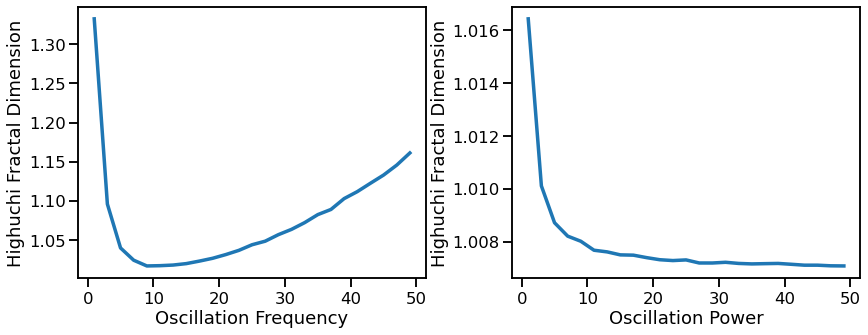

In [24]:
# Plot effect of oscillation variation on Higuchi fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, hfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Highuchi Fractal Dimension', ax=axes[0])
plot_lines(freqs, hfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Highuchi Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='hfd_osc_both', file_path='fractal')

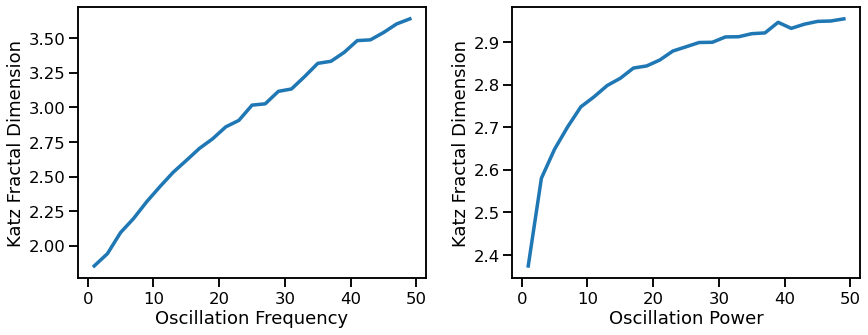

In [25]:
# Plot effect of oscillation variation on Katz fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, kfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Katz Fractal Dimension', ax=axes[0])
plot_lines(freqs, kfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Katz Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='kfd_osc_both', file_path='fractal')

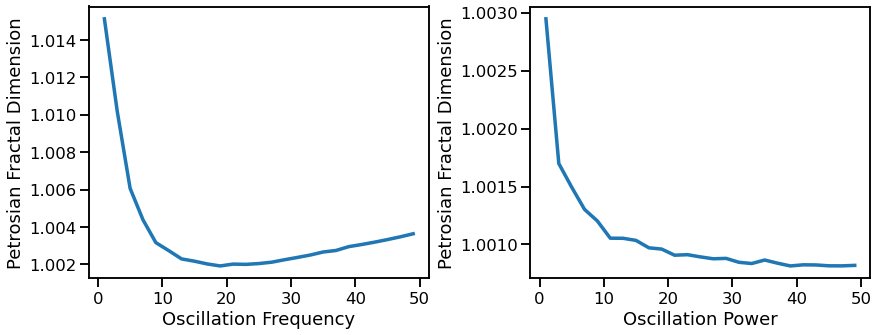

In [26]:
# Plot effect of oscillation variation on Petrosian fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(freqs, pfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Petrosian Fractal Dimension', ax=axes[0])
plot_lines(freqs, pfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Petrosian Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='pfd_osc_both', file_path='fractal')

## MISC OLD CODE IMPLEMENTATIONS

## PFD

In [27]:
# def pfd(X, D=None):
#     """Compute Petrosian Fractal Dimension of a time series from either two cases below:
#         1. X, the time series of type list (default)
#         2. D, the first order differential sequence of X (if D is provided, recommended to speed up)

#     In case 1, D is computed using Numpy's difference function.
#     To speed up, it is recommended to compute D before calling this function
#     because D may also be used by other functions whereas computing it here
#     again will slow down.

#     NOTE: copied from pyeeg
#     https://github.com/forrestbao/pyeeg/blob/master/pyeeg/fractal_dimension.py#L26
#     """

#     if D is None:
#         D = np.diff(X)
#         D = D.tolist()

#     N_delta = 0  # number of sign changes in derivative of the signal

#     for i in range(1, len(D)):
#         if D[i] * D[i - 1] < 0:
#             N_delta += 1

#     n = len(X)

#     return np.log10(n) / (np.log10(n) + np.log10(n / n + 0.4 * N_delta))

## HD

In [28]:
# def hfd(X, Kmax):
#     """Compute Higuchi Fractal Dimension of a time series X.
#     kmax is an HFD parameter.

#     NOTE: copied from pyeeg
#     https://github.com/forrestbao/pyeeg/blob/master/pyeeg/fractal_dimension.py#L4
#     """

#     L = []
#     x = []
#     N = len(X)

#     for k in range(1, Kmax):

#         Lk = []

#         for m in range(0, k):
#             Lmk = 0
#             for i in range(1, int(np.floor((N - m) / k))):
#                 Lmk += abs(X[m + i * k] - X[m + i * k - k])
#             Lmk = Lmk * (N - 1) / np.floor((N - m) / float(k)) / k
#             Lk.append(Lmk)

#         L.append(np.log(np.mean(Lk)))
#         x.append([np.log(float(1) / k), 1])

#     (p, _, _, _) = np.linalg.lstsq(x, L)

#     return p[0]

## Another HFD

In [29]:
# """
# Copied from:
# https://github.com/inuritdino/HiguchiFractalDimension/blob/master/hfd.py

# Higuchi Fractal Dimension according to:
# T. Higuchi, Approach to an Irregular Time Series on the
# Basis of the Fractal Theory, Physica D, 1988; 31: 277-283.
# """

# import numpy as np

# def hfd2(X, **kwargs):
#     """
#     Calculate Higuchi Fractal Dimension (HFD) for 1D data/series
#     Input:
#     X - input (time) series (must be 1D, to be converted into a NumPy array)
#     Output:

#     HFD
#     """
#     k, L = curve_length(X, **kwargs)
#     return lin_fit_hfd(k, L);


# def curve_length(X, num_k=50, k_max=None):
#     """
#     Calculate curve length <Lk> for Higuchi Fractal Dimension (HFD)

#     Input:

#     X - input (time) series (must be 1D, to be converted into a NumPy array)
#     num_k - number of k values to generate.
#     k_max - the maximum k (the k array is generated uniformly in log space
#             from 2 to k_max)

#     Output:
#     k - interval "times", window sizes
#     Lk - curve length
#     """
#     ### Make sure X is a NumPy array with the correct dimension
#     X = np.array(X)
#     if X.ndim != 1:
#         raise ValueError("Input array must be 1D (time series).")
#     N = X.size

#     # Get interval "time"
#     k_arr = interval_t(N,num_val=num_k,kmax=k_max)

#     # The average length
#     Lk = np.empty(k_arr.size,dtype=np.float)

#     for i in range(k_arr.size): # over array of k's
#         Lmk = 0.0
#         for j in range(k_arr[i]): # over m's
#             ## Construct X_k^m, i.e. X_(k_arr[i])^j, as X[j::k_arr[i]]
#             ## Calculate L_m(k)
#             Lmk += (
#                 np.sum(np.abs(np.diff( X[j::k_arr[i]] )))
#                 * (N - 1) / ( ( (N-j-1)//k_arr[i] ) * k_arr[i])
#             ) / k_arr[i]

#         ### Calculate the average Lmk
#         Lk[i] = Lmk / k_arr[i]

#     return (k_arr, Lk);


# def lin_fit_hfd(k,L,log=True):
#     """Calculate Higuchi Fractal Dimension (HFD) by fitting a line to already computed
#     interval times k and curve lengths L

#     Input:
#     k - interval "times", window sizes
#     L - curve length
#     log (=True) - k and L values will be transformed to np.log2(k) and np.log2(L), respectively

#     Output:
#     HFD
#     """
#     if log:
#         return (-np.polyfit(np.log2(k),np.log2(L),deg=1)[0]);
#     else:
#         return (-np.polyfit(k,L,deg=1)[0]);


# def interval_t(size,num_val=50,kmax=None):
#     """Generate sequence of interval times, k"""

#     if kmax is None:
#         k_stop = size//2
#     else:
#         k_stop = kmax
#     if k_stop > size//2:## prohibit going larger than N/2
#         k_stop = size//2
#         print("Warning: k cannot be longer than N/2")

#     k = np.logspace(start=np.log2(2),stop=np.log2(k_stop),base=2,num=num_val,dtype=np.int)
#     return np.unique(k);